# Part 3: Model and training fine-tuning

## 3.1 Modify the model arcitecture parameters, including: 
### a) Number of different layers
### b) Number of filters/ outputs in each layer

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Need to download the data
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
flip_train_images = []
for i in range(len(train_images)):
    img = np.fliplr(train_images[i])
    flip_train_images.append(img)

In [5]:
all_train_images = np.append(train_images, flip_train_images, axis = 0)
all_train_labels = np.append(train_labels, train_labels, axis = 0)

[8]


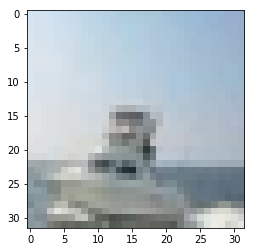

In [6]:
plt.imshow(all_train_images[100])
print(all_train_labels[100])

[8]


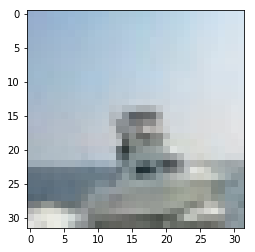

In [7]:
plt.imshow(all_train_images[50100])
print(all_train_labels[50100])

In [8]:
print('Number of images in the training set:', len(all_train_images))

print('Number of images in the test set: ', len(test_images))

Number of images in the training set: 100000
Number of images in the test set:  10000


In [9]:
# Normalize the Data
all_train_images = all_train_images.astype('float32')/255

test_images = test_images.astype('float32')/255

In [10]:
# Need to make the labels categorical form
from tensorflow.keras.utils import to_categorical

In [11]:
train_labels_categorical = to_categorical(all_train_labels)

test_labels_categorical = to_categorical(test_labels)

In [12]:
test_labels_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Isolate validation data
# Create a list of random integers between 0 and 50,000
num_val_samples = 10000

shuffle_indices = random.sample(range(0,100000), num_val_samples)

# Train images with random indices become new validation set
val_images = all_train_images[shuffle_indices]
val_labels = all_train_labels[shuffle_indices]
val_labels_categorical = train_labels_categorical[shuffle_indices]

# Remove the validation set from the training set 
all_train_images = np.delete(all_train_images, shuffle_indices, axis=0)
all_train_labels = np.delete(all_train_labels, shuffle_indices, axis=0)
train_labels_categorical = np.delete(train_labels_categorical, shuffle_indices, axis=0)

### Build the CNN

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2)) 
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax')) 

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4

In [16]:
num_epochs = 100
bs = 100

model = build_model()

history = model.fit(all_train_images, train_labels_categorical, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=bs, verbose=1)
# note that the default batch size is 32

Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 10s 114us/sample - loss: 2.3010 - accuracy: 0.1043 - val_loss: 2.2965 - val_accuracy: 0.1598
Epoch 2/100
90000/90000 [==============================] - 6s 61us/sample - loss: 2.2259 - accuracy: 0.1525 - val_loss: 2.1834 - val_accuracy: 0.1903
Epoch 3/100
90000/90000 [==============================] - 6s 62us/sample - loss: 2.1222 - accuracy: 0.2015 - val_loss: 2.1122 - val_accuracy: 0.2175
Epoch 4/100
90000/90000 [==============================] - 6s 62us/sample - loss: 2.0700 - accuracy: 0.2183 - val_loss: 2.0566 - val_accuracy: 0.2218
Epoch 5/100
90000/90000 [==============================] - 6s 61us/sample - loss: 2.0170 - accuracy: 0.2310 - val_loss: 1.9896 - val_accuracy: 0.2306
Epoch 6/100
90000/90000 [==============================] - 5s 61us/sample - loss: 1.9595 - accuracy: 0.2372 - val_loss: 1.9002 - val_accuracy: 0.2607
Epoch 7/100
90000/90000 [=======================

In [17]:
epoch_range = list(range(1, num_epochs+1))
training_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

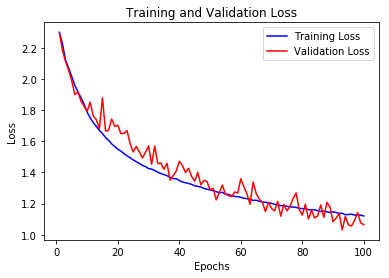

In [18]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

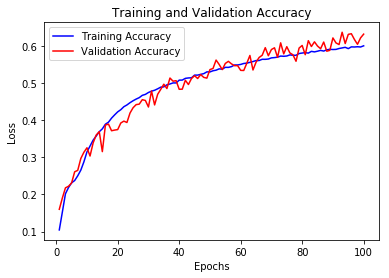

In [19]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)

print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)

10000/10000 [==============================] - 1s 107us/sample - loss: 1.0749 - accuracy: 0.6245
Test Loss =  1.0749313577651978
Test Accuracy =  0.6245
